In [72]:
# Lucas Paes Landim Pereira - RM550349
# Gabriela Soares Teixeira - RM98853
# Renan Carrara Coimbra - Rm552187

In [73]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy import stats

df = pd.read_csv("dados_indicadores_sociais_saude.csv", sep=';')
df.head()

,id,UF,total_moradores,situacao_censitaria,n_comodos,escolaridade,problemas_saude_ultimas_4_semanas,ultima_consulta_medica,ultima_consulta_odontologica,nas_ultimas_2_semanas_pq_nao_foi_ao_posto_de_saude,como_vc_avalia_sua_saude,peso,altura
0,1,Alagoas,1.0,Urbano,3.0,Classe de alfabetização: CA,Não,Até 1 ano,Mais de 1 ano a 2 anos,Não houve necessidade,Regular,58,164.0
1,2,Mato Grosso do Sul,3.0,Urbano,6.0,Antigo ginasial (médio 1º ciclo),Não,Até 1 ano,Mais de 1 ano a 2 anos,NaN,Regular,71,159.0
2,3,Goiás,3.0,Urbano,7.0,Regular do ensino médio ou do 2º grau,Não,Mais de 1 ano a 2 anos,Até 1 ano,Não houve necessidade,NaN,NaN,NaN
3,4,Paraná,5.0,Rural,6.0,NaN,Não,Até 1 ano,Até 1 ano,Não houve necessidade,NaN,NaN,NaN
4,5,Ceará,2.0,Urbano,6.0,"Antigo científico, clássico etc. (médio 2º ciclo)",Não,Mais de 3 anos,Até 1 ano,Não houve necessidade,Boa,72,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  5000 non-null   int64  
 1   UF                                                  5000 non-null   object 
 2   total_moradores                                     4754 non-null   float64
 3   situacao_censitaria                                 5000 non-null   object 
 4   n_comodos                                           4754 non-null   float64
 5   escolaridade                                        2999 non-null   object 
 6   problemas_saude_ultimas_4_semanas                   4754 non-null   object 
 7   ultima_consulta_medica                              4754 non-null   object 
 8   ultima_consulta_odontologica                        4754 non-null   object 
 9

In [75]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 4992
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   id                                                  802 non-null    int64  
 1   UF                                                  802 non-null    object 
 2   total_moradores                                     802 non-null    float64
 3   situacao_censitaria                                 802 non-null    object 
 4   n_comodos                                           802 non-null    float64
 5   escolaridade                                        802 non-null    object 
 6   problemas_saude_ultimas_4_semanas                   802 non-null    object 
 7   ultima_consulta_medica                              802 non-null    object 
 8   ultima_consulta_odontologica                        802 non-null    object 
 9   nas

### 1 – Criar uma coluna chamada IMC, o cálculo é: peso / ((altura/100)**2). (1 ponto)

In [76]:
valores_distintos = df['peso'].unique()

print(valores_distintos)

['58' '90' '79' '75' '86' '63' '61' '73' '81' '110' '92' '70' '57' '48'
 '45' '98' '59' '102' '74' '68' '99' '78' '80' '60' '54' '65' '108' '91'
 '88' '67' '94' '107' '96' '82' '51' '62' '72' '56' '95' '64' '101' '71'
 '53' '76' '84' '83' '46' '77' '85' '69' '97' '100' '105' '55' '41' '52'
 '93' '50' '66' '87' '66,5' '115' '47' '113' '89' '120' '44' '123' '103'
 '109' '30' '122' '86,5' '130' '112' '61,5' '40' '42' '128' '117']


In [77]:
valores_distintos = df['peso'].unique()

print(valores_distintos)

['58' '90' '79' '75' '86' '63' '61' '73' '81' '110' '92' '70' '57' '48'
 '45' '98' '59' '102' '74' '68' '99' '78' '80' '60' '54' '65' '108' '91'
 '88' '67' '94' '107' '96' '82' '51' '62' '72' '56' '95' '64' '101' '71'
 '53' '76' '84' '83' '46' '77' '85' '69' '97' '100' '105' '55' '41' '52'
 '93' '50' '66' '87' '66,5' '115' '47' '113' '89' '120' '44' '123' '103'
 '109' '30' '122' '86,5' '130' '112' '61,5' '40' '42' '128' '117']


In [78]:
df['peso'] = df['peso'].str.replace(',', '.').astype(float)

In [79]:
df['IMC'] = df['peso'] / ((df['altura'] / 100) ** 2)

## 2 – Realizar análise descritiva para: IMC, Peso, Altura, n_comodos, “como_vc_avalia_sua_saude” e “situação censitária”. (1,5 pontos):


In [80]:
# Análise descritiva para variáveis numéricas
print(df[['IMC', 'peso', 'altura', 'n_comodos']].describe())


              IMC        peso      altura   n_comodos
count  802.000000  802.000000  802.000000  802.000000
mean    26.554247   73.806733  166.551122    5.875312
std      4.702178   15.161348    9.260848    2.294087
min     14.268728   30.000000  135.000000    1.000000
25%     23.316211   62.250000  160.000000    5.000000
50%     26.171875   72.000000  166.000000    5.000000
75%     29.384757   82.000000  173.000000    7.000000
max     44.864605  130.000000  193.000000   25.000000


In [81]:
# Análise descritiva para variáveis categóricas
print(df['como_vc_avalia_sua_saude'].value_counts())
print(df['situacao_censitaria'].value_counts())

como_vc_avalia_sua_saude
Boa           429
Regular       228
Muito boa     117
Ruim           23
Muito ruim      5
Name: count, dtype: int64
situacao_censitaria
Urbano    634
Rural     168
Name: count, dtype: int64


## 3 – Imagine que você precisa retirar uma amostra destes dados. Qual o tamanho que você utilizaria? (A variável principal será “como_vc_avalia_sua_saude”, usar nível de confiança 95%,margem de erro 2%). (1,5 pontos)

In [92]:
# formula para cálculo de tamanho de amostra para dados discretos
def formula_amostra_discreta(N, Z, ME):
    n = (Z**2 * 0.25 * N) / ((ME**2 * (N-1)) + (Z**2 * 0.25))
    return int(n)

# A AMOSTRA DISCRETA: QUANTIDADE DE PRODUTOS NO CARRINHO. PREÇO. NOME.
# A AMOSTRA CONTINUA: DADOS CUJA REPRESENTAÇÃO É INFINITA 39ºc, 39,01ºC 39,001ºC
# DISCRETIZAR A MINHA VARIÁVEL 39ºC 40ºC

N = 802 # TAMANHO DA MINHA POPULAÇÃO
# para 90% de intervalo de confiança: 1.64
# para 95% de intervalo de confiança: 1.96
# para 99% de intervalo de confiança: 2.1
Z = 1.96
# margem de erro de 2%

ME = 0.02
print(formula_amostra_discreta(N, Z, ME))

601


## 4 – Aplicar um teste t para Problemas Saúde Últimas 4 semanas e IMC, realizar todos os passos necessários para testar hipóteses. Lembre-se de tirar os missings para ambas as variáveis. (2 pontos)


In [83]:
# Remover linhas com valores faltantes nas colunas relevantes
df = df.dropna(subset=['problemas_saude_ultimas_4_semanas', 'IMC'])

# Dividir os dados em dois grupos com base na coluna 'problemas_saude_ultimas_4_semanas'
grupo1 = df[df['problemas_saude_ultimas_4_semanas'] == 'Sim']['IMC']
grupo2 = df[df['problemas_saude_ultimas_4_semanas'] == 'Não']['IMC']

# Realizar o teste t de amostras independentes
teste_t, p_valor = stats.ttest_ind(grupo1, grupo2)

print('Estatística_t:', teste_t)
print('P_Valor:', p_valor)

Estatística_t: 1.7185194349980977
P_Valor: 0.08608880764445404


## 5 – Aplicar um teste de Qui-Quadrado para verificar a associação entre “ultima_consulta_medica” e “situacao_censitaria”. Realizar todos os passos necessários para testar hipóteses. Lembre-se de tirar os missings para ambas as variáveis. (2 pontos)

In [84]:
df = df.dropna(subset=['ultima_consulta_medica', 'situacao_censitaria'])

In [85]:
chi = pd.crosstab(df['ultima_consulta_medica'], df['situacao_censitaria'])

In [86]:
chi_score, p_val, dof, expected = chi2_contingency(chi)

# chi_score: estatistica-t
# p_valor: porcentagem
# dof: graus de liberdade
# saber se as variáveis são dependentes ou não
# modelo do teste de hipóteses:
# H0 diz que não existe associação entre as variáveis (É INDEPENDENTE)
# H1 diz que existe associação entre as variáveis (É DEPENDENTE)

print('P_Valor:', p_val)

alpha = 0.05

if p_val < alpha:
    print("As variáveis são dependentes")
    
else:
    print("As variáveis são independentes")

P_Valor: 0.12186147827977767
As variáveis são independentes


## 6 – Verificar a correlação entre peso, altura e n_comodos. Além disso, gerar gráficos de dispersão entre estas variáveis. (2 pontos)

In [87]:
matriz_corr = df[['peso', 'altura', 'n_comodos']].corr()

print(matriz_corr)

               peso    altura  n_comodos
peso       1.000000  0.495047   0.013987
altura     0.495047  1.000000  -0.001580
n_comodos  0.013987 -0.001580   1.000000


In [88]:
# Relações
print("\nRelações:")
print("peso e altura: A correlação é de {:.6f}, indicando uma correlação direta moderada.".format(matriz_corr.loc['peso', 'altura']))
print("peso e n_comodos: A correlação é de {:.6f}, indicando que não há correlação.".format(matriz_corr.loc['peso', 'n_comodos']))
print("altura e n_comodos: A correlação é de {:.6f}, indicando que não há correlação.".format(matriz_corr.loc['altura', 'n_comodos']))



Relações:
peso e altura: A correlação é de 0.495047, indicando uma correlação direta moderada.
peso e n_comodos: A correlação é de 0.013987, indicando que não há correlação.
altura e n_comodos: A correlação é de -0.001580, indicando que não há correlação.


Gráficos: 

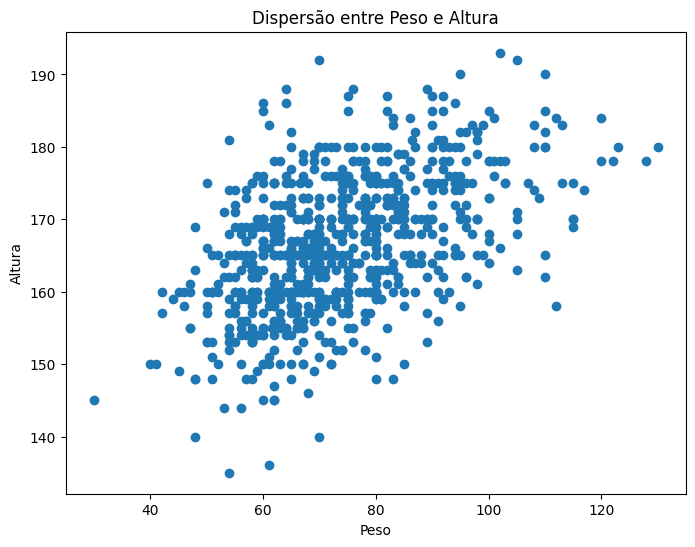

In [89]:
import matplotlib.pyplot as plt

# Gráfico de dispersão entre 'peso' e 'altura'
plt.figure(figsize=(8, 6))
plt.scatter(df['peso'], df['altura'])
plt.title('Dispersão entre Peso e Altura')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.show()

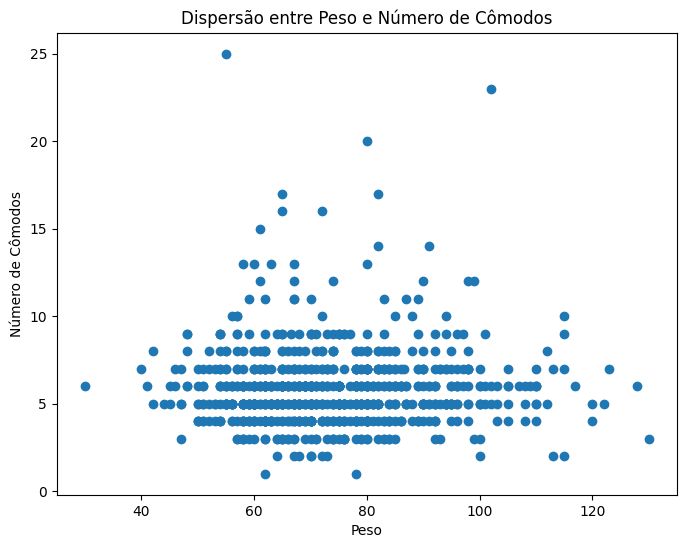

In [90]:
# Gráfico de dispersão entre 'peso' e 'n_comodos'
plt.figure(figsize=(8, 6))
plt.scatter(df['peso'], df['n_comodos'])
plt.title('Dispersão entre Peso e Número de Cômodos')
plt.xlabel('Peso')
plt.ylabel('Número de Cômodos')
plt.show()

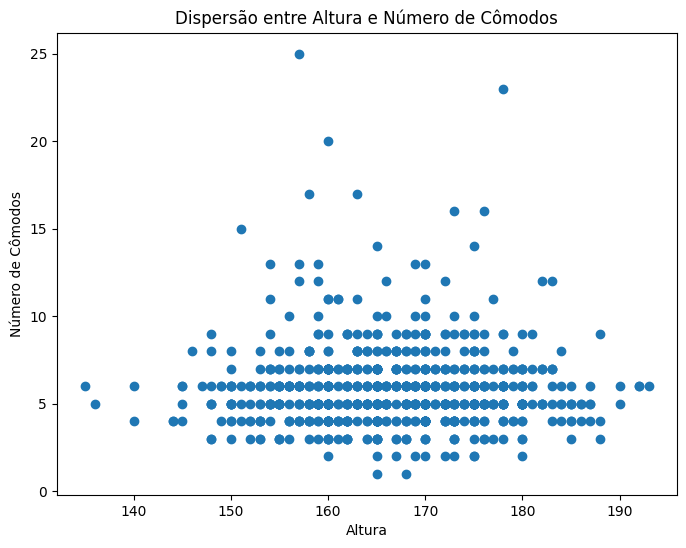

In [91]:
# Gráfico de dispersão entre 'altura' e 'n_comodos'
plt.figure(figsize=(8, 6))
plt.scatter(df['altura'], df['n_comodos'])
plt.title('Dispersão entre Altura e Número de Cômodos')
plt.xlabel('Altura')
plt.ylabel('Número de Cômodos')
plt.show()